$~$

# IT Academy - Data Science Itinerary



$~$

## S12 T02: DB with MySQl
___


In [1]:
#importing libraries
import mysql.connector
from mysql.connector import Error
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

$~$
___
####  Exercise 1

$~$

Create relational database and access with Python

$~$
___

For this exercise we will design a database for a **library**.

$~$

+ First, we have designed a diagram for the database as follows.

$~$

![Image](./diagram1.png)

$~$

+ The next step was to write a sql script to create the database and the tables

$~$

The scrip with which we have the database is as follows. 

$~$

(***note that the scrip is also part of the repository.***)

In [ ]:
CREATE DATABASE IF NOT EXISTS library1;
USE library1;
DROP TABLE IF EXISTS Borrow;
DROP TABLE IF EXISTS Book;
DROP TABLE IF EXISTS Clients;
DROP TABLE IF EXISTS Topic;
DROP TABLE IF EXISTS Publishing_house;
DROP TABLE IF EXISTS Author;

CREATE TABLE Author (
	idauthor INT NOT NULL AUTO_INCREMENT,
	NameAuthor VARCHAR(60) NOT NULL,
	PRIMARY KEY (idauthor)
) ENGINE=InnoDB;

CREATE TABLE Publishing_house (
	idpublishing INT NOT NULL AUTO_INCREMENT,
	Namepublishing VARCHAR(30) NOT NULL,
	Address VARCHAR (100) NOT NULL,
	Telephone VARCHAR (15) NOT NULL, 
 	PRIMARY KEY (idpublishing)
) ENGINE=InnoDB;

CREATE TABLE Topic (
	idTopic INT NOT NULL AUTO_INCREMENT,
	NameTopic VARCHAR(30) NOT NULL,
	PRIMARY KEY (idTopic)
) ENGINE=InnoDB;

CREATE TABLE Clients (
	idClient INT NOT NULL AUTO_INCREMENT,
	NameClients VARCHAR(60) NOT NULL,
	Address VARCHAR(100) NOT NULL,
	Email VARCHAR(60) NULL DEFAULT 'non E-mail',
	Telephone VARCHAR(15) NOT NULL,
	PRIMARY KEY (idClient)
) ENGINE=InnoDB;

CREATE TABLE Book (
	idBook INT NOT NULL AUTO_INCREMENT,
	ISBN VARCHAR(20) NOT NULL UNIQUE,
	Title VARCHAR(100) NOT NULL,
	NumberExemplars TINYINT NOT NULL,
	idauthor INT NOT NULL,
	idpublishing INT NOT NULL,
	idTopic INT NOT NULL,
	PRIMARY KEY (idBook),
	FOREIGN KEY (idauthor) REFERENCES Author (idauthor) ON DELETE CASCADE ON UPDATE CASCADE,
	FOREIGN KEY (idpublishing) REFERENCES Publishing_house (idpublishing) ON DELETE CASCADE ON UPDATE CASCADE,
	FOREIGN KEY (idTopic) REFERENCES Topic (idTopic) ON DELETE CASCADE ON UPDATE CASCADE
) ENGINE=InnoDB;

CREATE TABLE Borrow (
	idBorrow INT NOT NULL AUTO_INCREMENT,
	DateBorrow DATE NOT NULL,
	DateDeliver DATE NOT NULL,
	idClient INT NOT NULL,
	idBook INT NOT NULL,
	PRIMARY KEY (idBorrow),
	FOREIGN KEY (idClient) REFERENCES Clients (idClient) ON DELETE CASCADE ON UPDATE CASCADE,
	FOREIGN KEY (idBook) REFERENCES Book (idBook) ON DELETE CASCADE ON UPDATE CASCADE
) ENGINE=InnoDB;

$~$

+ the next step is to generate synthetic data and add them into the database.

$~$

*we use this [data generator](https://generatedata.com/generator)*

$~$

In [ ]:
INSERT INTO `Clients` (`NameClients`,`Address`,`Email`,`Telephone`)
VALUES
  ("Ryder Steele","P.O. Box 158, 4634 A, Ave","tempor.lorem@outlook.edu","03 28 13 11 45"),
  ("Keaton Hyde","Ap #457-4440 Nec, Ave","augue.ut@outlook.net","07 74 65 60 63"),
  ("Marah Gallagher","7181 Sed Road","sed.pharetra@google.edu","09 37 78 81 29"),
  ("Tyrone Barker","P.O. Box 410, 178 Vel, Av.","luctus.lobortis@icloud.net","08 45 23 53 47"),
  ("Iliana Tillman","7289 A Ave","et.magna@aol.couk","01 56 81 84 57");
  
  INSERT INTO `Author` (`NameAuthor`)
VALUES
  ("Alea Simoes"),
  ("Demetrius Marques"),
  ("Plato Santiago"),
  ("Nehru Fonseca"),
  ("India Batista");
  
  INSERT INTO `Publishing_house` (`NamePublishing`,`Address`,`Telephone`)
VALUES
  ("Sed Diam Industries","Ap #342-8254 Erat Ave","(033022) 028761"),
  ("Enim Sit Amet Foundation","Ap #225-1004 Aliquam, Rd.","(051) 80819248"),
  ("In Consequat LLP","900 Vulputate St.","(08379) 5999232"),
  ("Semper Cursus LLP","159-736 Consectetuer, Rd.","(056) 72455721");

INSERT INTO `Topic` (`NameTopic`)
VALUES
  ("Graphic novel"),
  ("Philosophy"),
  ("Autobiography"),
  ("Classic"),
  ("Crime");
INSERT INTO Book (`ISBN`, `Title`, `NumberExemplars`, `idauthor`, `idpublishing`, `idTopic`) VALUES  
('944725406-3', 'R.S.V.P. ', 1, 3, 4, 5),
('486432848-X', 'Saint of Fort Washington', 0, 2, 3, 2),
('407309289-8', 'Prodigal Sons', 3, 1, 2, 1),
('293673365-0', 'Hustler White', 1, 3, 1, 1),
('137445174-6', 'Death of a Salesman', 5, 1, 2, 2),
('253848396-4', 'Better Off Dead.', 3, 1, 4, 3),
('399881251-2', 'Jekyll & Hyde', 1, 1, 1, 4),
('205833031-5', 'Play Dirty', 5, 2, 3, 4),
('089984664-5', 'After the Thin Man', 0, 1, 3, 4),
('742307038-6', 'Playing for Keeps', 0, 5, 4, 5);

INSERT INTO `Borrow` (`DateBorrow`,`DateDeliver`,`IdClient`,`idBook`)
VALUES
  ("14-01-21","02-02-21",4,5),
  ("24-01-21","03-02-21",2,6),
  ("01-01-21","14-02-21",2,4),
  ("02-01-21","02-02-21",2,3),
  ("31-01-21","01-02-21",3,7),
  ("09-01-21","02-02-21",2,3),
  ("01-02-21","15-02-21",5,7);


$~$

let's connect to our database using python:


$~$

In [2]:
db = mysql.connector.connect(
     host="localhost",
     user="root",
     password="123456sql")

print(db)

mycursor = db.cursor(buffered=True,dictionary=True)


In [3]:
#cheking for the database
mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

{'Database': 'information_schema'}
{'Database': 'library'}
{'Database': 'library1'}
{'Database': 'mysql'}
{'Database': 'performance_schema'}
{'Database': 'sys'}


In [4]:
#cheking for the tables in the library dataset
mycursor.execute("USE library1")
mycursor.execute("SHOW tables")

for x in mycursor:
    print(x)


{'Tables_in_library1': 'Author'}
{'Tables_in_library1': 'Book'}
{'Tables_in_library1': 'Borrow'}
{'Tables_in_library1': 'Clients'}
{'Tables_in_library1': 'Publishing_house'}
{'Tables_in_library1': 'Topic'}


$~$
___
####  Exercise 2

$~$

shows that some simple queries can be executed to a Pandas Dataframe:

$~$
___

$~$

let's generate a first query: let's look at the authors' names:

$~$

In [5]:
#cheking Author table
query = "SELECT * from Author;"
mycursor.execute(query)
mycursor.fetchall()

[{'idauthor': 1, 'NameAuthor': 'Alea Simoes'},
 {'idauthor': 2, 'NameAuthor': 'Demetrius Marques'},
 {'idauthor': 3, 'NameAuthor': 'Plato Santiago'},
 {'idauthor': 4, 'NameAuthor': 'Nehru Fonseca'},
 {'idauthor': 5, 'NameAuthor': 'India Batista'}]

In [6]:
#save authors table into dataframe
authors = pd.read_sql(query,db)
authors

,idauthor,NameAuthor
0,1,Alea Simoes
1,2,Demetrius Marques
2,3,Plato Santiago
3,4,Nehru Fonseca
4,5,India Batista


$~$

Let's look at the Clients table:

$~$

In [7]:
#cheking on Clients table
query2 = "SELECT * from Clients"
mycursor.execute(query2)
mycursor.fetchall()


[{'idClient': 1,
  'NameClients': 'Ryder Steele',
  'Address': 'P.O. Box 158, 4634 A, Ave',
  'Email': 'tempor.lorem@outlook.edu',
  'Telephone': '03 28 13 11 45'},
 {'idClient': 2,
  'NameClients': 'Keaton Hyde',
  'Address': 'Ap #457-4440 Nec, Ave',
  'Email': 'augue.ut@outlook.net',
  'Telephone': '07 74 65 60 63'},
 {'idClient': 3,
  'NameClients': 'Marah Gallagher',
  'Address': '7181 Sed Road',
  'Email': 'sed.pharetra@google.edu',
  'Telephone': '09 37 78 81 29'},
 {'idClient': 4,
  'NameClients': 'Tyrone Barker',
  'Address': 'P.O. Box 410, 178 Vel, Av.',
  'Email': 'luctus.lobortis@icloud.net',
  'Telephone': '08 45 23 53 47'},
 {'idClient': 5,
  'NameClients': 'Iliana Tillman',
  'Address': '7289 A Ave',
  'Email': 'et.magna@aol.couk',
  'Telephone': '01 56 81 84 57'}]

In [8]:
#save clients into dataframe
clients = pd.read_sql(query2,db)
clients

,idClient,NameClients,Address,Email,Telephone
0,1,Ryder Steele,"P.O. Box 158, 4634 A, Ave",tempor.lorem@outlook.edu,03 28 13 11 45
1,2,Keaton Hyde,"Ap #457-4440 Nec, Ave",augue.ut@outlook.net,07 74 65 60 63
2,3,Marah Gallagher,7181 Sed Road,sed.pharetra@google.edu,09 37 78 81 29
3,4,Tyrone Barker,"P.O. Box 410, 178 Vel, Av.",luctus.lobortis@icloud.net,08 45 23 53 47
4,5,Iliana Tillman,7289 A Ave,et.magna@aol.couk,01 56 81 84 57


$~$

Let's take a look at the detail of the books in the library:

$~$

In [9]:
query3 ="SELECT\
         Author.NameAuthor as Author, Book.Title,Topic.NameTopic as Topic,\
        Publishing_house.Namepublishing as Publishing_house_name,Book.NumberExemplars\
        FROM Author\
        INNER JOIN Book ON Author.idauthor=Book.idauthor\
        INNER JOIN Topic ON Topic.idTopic = Book.idTopic\
        INNER JOIN Publishing_house ON Publishing_house.idpublishing = Book.idpublishing\
        ORDER BY NumberExemplars DESC"

In [10]:
mycursor.execute(query3)
books = clients = pd.read_sql(query3,db)


In [11]:
#total books 
books

,Author,Title,Topic,Publishing_house_name,NumberExemplars
0,Alea Simoes,Death of a Salesman,Philosophy,Enim Sit Amet Foundation,5
1,Demetrius Marques,Play Dirty,Classic,In Consequat LLP,5
2,Alea Simoes,Prodigal Sons,Graphic novel,Enim Sit Amet Foundation,3
3,Alea Simoes,Better Off Dead.,Autobiography,Semper Cursus LLP,3
4,Plato Santiago,Hustler White,Graphic novel,Sed Diam Industries,1
5,Alea Simoes,Jekyll & Hyde,Classic,Sed Diam Industries,1
6,Plato Santiago,R.S.V.P.,Crime,Semper Cursus LLP,1
7,Demetrius Marques,Saint of Fort Washington,Philosophy,In Consequat LLP,0
8,Alea Simoes,After the Thin Man,Classic,In Consequat LLP,0
9,India Batista,Playing for Keeps,Crime,Semper Cursus LLP,0


$~$

which clients have loans?

$~$

In [12]:
query4 = "SELECT\
        distinct(NameClients), count(idBorrow) as total_Borrows\
        FROM Clients\
        INNER JOIN Borrow on Clients.idClient = Borrow.idClient\
        GROUP BY NameClients"

In [13]:
mycursor.execute(query4)
loans_by_clients = pd.read_sql(query4,db)
loans_by_clients

,NameClients,total_Borrows
0,Keaton Hyde,4
1,Marah Gallagher,1
2,Tyrone Barker,1
3,Iliana Tillman,1


$~$

finally, let's take a look at the detail of the Borrows:

$~$

In [14]:
query5 = "SELECT\
        NameClients as Client, Title, Namepublishing as Publish_house,\
        count(idBorrow) as total_Borrows\
        FROM Clients\
        INNER JOIN Borrow on Clients.idClient = Borrow.idClient\
        INNER JOIN Book on Book.idBook = Borrow.idBook\
        INNER JOIN Publishing_house on Publishing_house.idpublishing = Book.idpublishing\
        GROUP BY Title, NameClients, Namepublishing\
        ORDER BY total_Borrows DESC"

In [15]:
mycursor.execute(query5)
loans_by_clients_title = pd.read_sql(query5,db)
loans_by_clients_title

,Client,Title,Publish_house,total_Borrows
0,Keaton Hyde,Prodigal Sons,Enim Sit Amet Foundation,2
1,Tyrone Barker,Death of a Salesman,Enim Sit Amet Foundation,1
2,Keaton Hyde,Better Off Dead.,Semper Cursus LLP,1
3,Keaton Hyde,Hustler White,Sed Diam Industries,1
4,Marah Gallagher,Jekyll & Hyde,Sed Diam Industries,1
5,Iliana Tillman,Jekyll & Hyde,Sed Diam Industries,1


$~$
___
####  Exercise 3

$~$

Generate some plots to summarizing the data. 

$~$
___

$~$

+ Total borrow books by clients

$~$

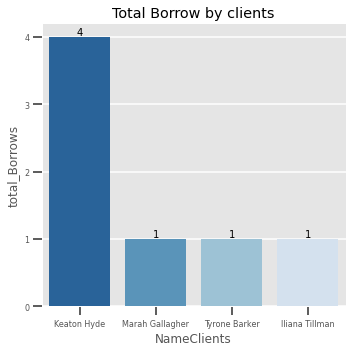

In [17]:
sns.set_context("talk")
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize =(5,5))
sns.barplot(x="NameClients",y="total_Borrows", data=loans_by_clients, palette="Blues_r")
ax.bar_label(ax.containers[0])
plt.title("Total Borrow by clients")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

ValueError: Could not interpret input 'Publishing_house_name'

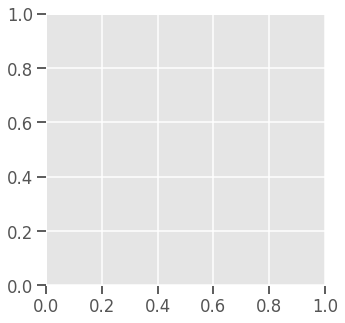

In [20]:
books.Publishing_house_name.value_counts()

sns.set_context("talk")
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize =(5,5))
sns.barplot(x="Publishing_house_name",y="value_counts", data=books.Publishing_house_name.value_counts(), palette="Blues_r")
ax.bar_label(ax.containers[0])
plt.title("Total Borrow by clients")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

$~$
___
####  Conclusions

$~$




___
$~$

___
$~$

####  *References*:

+ [How to Execute SQL Queries in Python and R Tutorial ](https://www.datacamp.com/tutorial/tutorial-how-to-execute-sql-queries-in-r-and-python) 
+ [Getting Started with MySQL Python Connector](https://www.mysqltutorial.org/getting-started-mysql-python-connector/) 

$~$
___